In [161]:
import pandas as pd
X = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/MNIST/train.csv')

In [162]:
X.shape


(42000, 785)

1 make the train set and test set as X_train Y_target

In [163]:
X.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
X_train = X.drop(columns='label',axis = 1)
Y_train = pd.DataFrame(X['label'])

In [165]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
Y_train.head(2)

,label
0,1
1,0


In [167]:
Y_train.shape

(42000, 1)

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


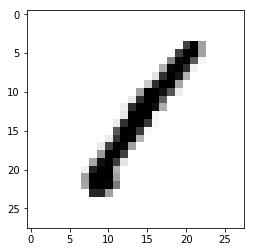

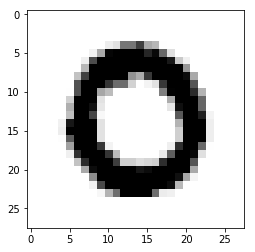

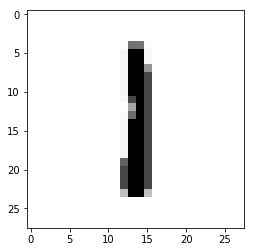

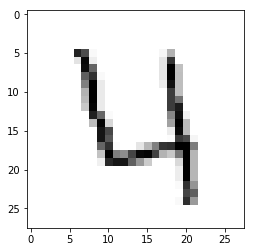

In [168]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.figure(1)


# drawing image and there label
for i in range(0,4):
    image = X_train.iloc[i]
    image_reshape = image.reshape(28,28)
    plt.imshow(image_reshape,cmap = matplotlib.cm.binary)
    plt.show()

### Shuffling the dataset

In [169]:
import numpy as np
length = len(X_train)

shuffle_index = np.random.permutation(length)
X_train,Y_train = X_train.iloc[shuffle_index],Y_train.iloc[shuffle_index]


### Training a binay classifier

In [172]:
Y_train_5 = Y_train['label'] == 5

In [69]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,Y_train_5)

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [179]:
Y_train_5.head()

3173      True
29670     True
14797    False
2375     False
6807     False
Name: label, dtype: bool

In [180]:
some_digit =X_train.iloc[0]
sgd_clf.predict([some_digit])

array([False])

### Measuring accuracy using cross validation

In [181]:
from sklearn.model_selection import cross_val_score
cross_val_score( sgd_clf,X_train,Y_train_5,cv =3,scoring="accuracy")


/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWar

array([0.94928571, 0.9575    , 0.95757143])

http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

In [182]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    #Note nothing for initialization has been written here
    def fit(self,X,y=None):
        pass
        #do nothing
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool )
    

In [183]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,Y_train_5,cv = 3,scoring ="accuracy")

array([0.90771429, 0.909     , 0.91221429])

### Confusion Matrix

In [184]:
from sklearn.model_selection._validation import cross_val_predict
Y_train_5_predict = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3)

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWar

In [185]:
import sklearn.metrics as m
m.confusion_matrix(Y_train_5,Y_train_5_predict)

array([[37177,  1028],
       [  871,  2924]])

In [186]:
from sklearn.metrics import precision_score ,recall_score


In [187]:
print( "recall" + str(recall_score(Y_train_5,Y_train_5_predict)))
print( "precision" + str(precision_score(Y_train_5,Y_train_5_predict)))

recall0.7704874835309617
precision0.7398785425101214


In [188]:
from sklearn.metrics import f1_score
f1_score( Y_train_5,Y_train_5_predict)

0.7548728540080031

### Precision Recall tradeoff

In [189]:


y_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3,
                             method="decision_function")



/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWar

In [190]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train_5, y_scores)

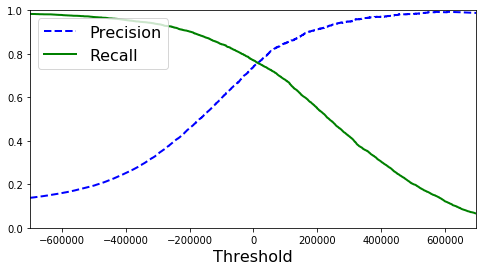

In [191]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

### ROC curves

In [192]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train_5, y_scores)

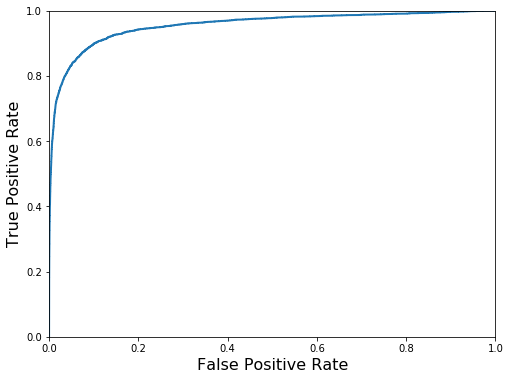

In [194]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()
